<a href="https://colab.research.google.com/github/mtxslv/StudyingMachineLearning/blob/master/ConceitosMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Reconhecimentos:

In [0]:
# Profundos agradecimentos a Gilvandro César de Medeiros pela confiança e espírito inovador.
# Agradecimentos aos professores Orivaldo Santana e Fábio Souza, pela confiança, ensinos e guia.
# Agradecimentos a Ricardo Halla por dividir dúvidas e tanto conhecimento comigo.
# Agradecimentos a meus amigos e colegas por estarem nesse barco comigo.
# Huge thanks to Chris Albon, whose example helped me writing the Perceptron code. 
#   Please, check out his work: <https://chrisalbon.com/machine_learning/basics/perceptron_in_scikit-learn/>

#Importações importantes:

In [0]:
import numpy as np # necessário para gerar base de dados
import matplotlib.pyplot as plt # necessário para plotagem
import pandas as pd # objetos pandas são comumente utilizados para base de dados
from sklearn.linear_model import Perceptron #modelo de aprendizado de máquina a ser utilizado
from sklearn.model_selection import train_test_split #separar conjuntos de teste e de treino
from sklearn.preprocessing import StandardScaler # necessário pra escalonar os dados
from sklearn.metrics import accuracy_score # averiguar a acurácia dos modelos

Falar, na minha aulinha, porque é importante normalizar os dados durante o aprendizado de máquina. Referências [aqui](https://developers.google.com/machine-learning/crash-course/representation/cleaning-data)

# Redes Neurais Artificiais TO_DO


A hipótese conexionista é uma alternativa à computação algorítmica, e relembra (em algum ponto) a estrutura do cérebro humano.


In [0]:
# TODO

## Neurônio artificial: Perceptron

O perceptron é ...

Para o primeiro exemplo, iremos tratar um problema [linearmente separável](https://en.wikipedia.org/wiki/Linear_separability). Isto é, nosso conjunto de dados pode ser separado por um hiperplano (em duas dimensões, uma linha) de forma que nenhum exemplo da **classe A** aparece na "área" da **classe B** e vice-versa.

In [0]:
# Construindo o data-set

# gerando uma matrix 600x2 com dados pseudo-randômicos
data = np.random.randint(low = 0,high = 100,size = (600,2)) 
#Atribuindo os valores de data a um objeto pandas
X = pd.DataFrame(X,columns = ['x1','x2'])

# Vamos supor que pontos acima da linha x2 = 0.6*x1 + 20 pertencem
# à classe 1, e os restantes à classe 0:
y = (0.6*X['x1']+20>X['x2']).astype(int)
  

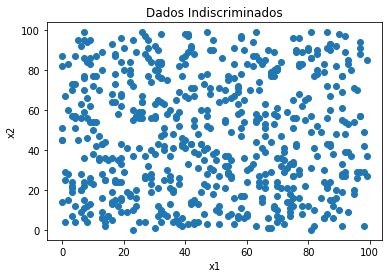

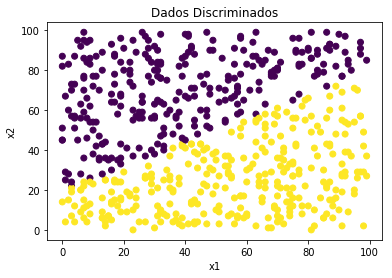

In [58]:
#Observando nosso data-set

plt.figure(1)
plt.title('Dados Indiscriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X['x1'],X['x2'])

plt.figure(2)
plt.title('Dados Discriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X['x1'],X['x2'],c=y)

plt.show()


In [0]:
# Some pre-processing

# Train the scaler, which standarizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(X)

# Apply the scaler to the X training data
X_std = sc.transform(X)


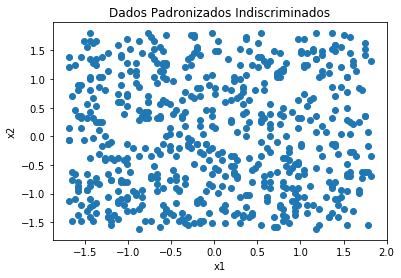

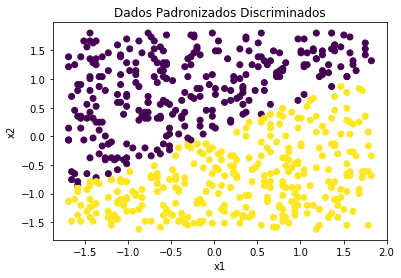

In [60]:
#Let's see what just happened...


plt.figure(1)
plt.title('Dados Padronizados Indiscriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_std[:,0],X_std[:,1])

plt.figure(2)
plt.title('Dados Padronizados Discriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_std[:,0],X_std[:,1],c=y)

plt.show()


In [0]:
# Split the data into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3)

In [99]:
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ptron = Perceptron(max_iter=1000, eta0=0.1, random_state=0)

# Train the perceptron
ptron.fit(X_train, y_train)

#Valores relativos ao aprendizado...
print(f'ptron.coefs_ = {ptron.coef_} , ptron.intercept_ = {ptron.intercept_}')

ptron.coefs_ = [[ 0.53357475 -1.03320992]] , ptron.intercept_ = [0.1]


In [0]:
# Vamos tentar prever os valores relativos a X_test
y_pred = ptron.predict(X_test)

Accuracy: 0.98


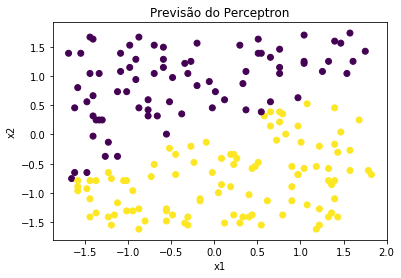

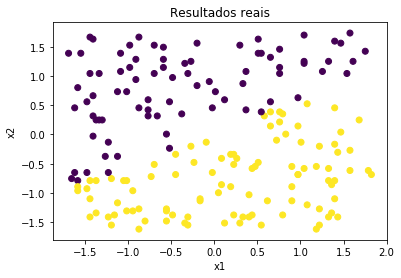

In [104]:
#Let's see what just happened...


#Numericamente...
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
# Confusion matrix... TODO

# Graficamente...
plt.figure(1)
plt.title('Previsão do Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_test[:,0],X_test[:,1],c = y_pred)

plt.figure(2)
plt.title('Resultados reais')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_test[:,0],X_test[:,1],c = y_test)

plt.show()


## Neurônio Artificial: Adaline

## *Multi-Layer Perceptron* (Perceptron de Muitas Camadas)